In [16]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
engine = create_engine("sqlite:///hawaii.sqlite?check_same_thread=False")
#https://stackoverflow.com/questions/34009296/using-sqlalchemy-session-from-flask-raises-sqlite-objects-created-in-a-thread-c

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [89]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.tobs).filter(extract("month", Measurement.date)==6)

In [90]:
#  3. Convert the June temperatures to a list.
dates=results.all()

In [91]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_temps = pd.DataFrame(dates)
June_temps.columns = ['Temperature (F)']

In [92]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temps.describe()

,Temperature (F)
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [80]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.tobs).filter(extract("month", Measurement.date)==12)

In [81]:
# 7. Convert the December temperatures to a list.
dates=results.all()

In [82]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_temps = pd.DataFrame(dates)
Dec_temps.columns = ['Temperature (F)']

In [83]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temps.describe()

,Temperature (F)
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [32]:
#find start and end dates of data
session.query(func.min(Measurement.date),func.max(Measurement.date)).all()

[('2010-01-01', '2017-08-23')]

In [41]:
#list all data columns in data set
from sqlalchemy import inspect
for k in Base.classes:
    inst = inspect(k)
    print(inst.columns.keys())

['id', 'station', 'date', 'prcp', 'tobs']
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


<AxesSubplot:ylabel='Frequency'>

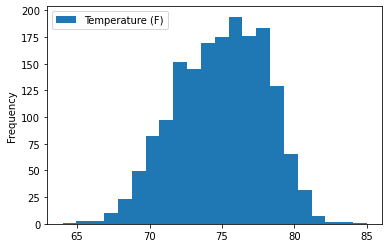

In [67]:
#plot histogram of june and dec temps to observe shape of temp distribution
June_temps.plot.hist(bins=22)

<AxesSubplot:ylabel='Frequency'>

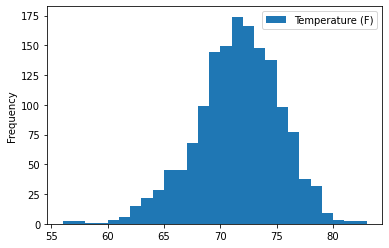

In [84]:
#dec histogram
Dec_temps.plot.hist(bins=27)

In [93]:
#find mode of temps as part of understanding skew in temps
pd.DataFrame(index=['Dec','June'],data=[Dec_temps.mode().iloc[0], June_temps.mode().iloc[0]])

,Temperature (F)
Dec,71.0
June,76.0


Text(0.5, 1.0, 'December Temp Boxplot')

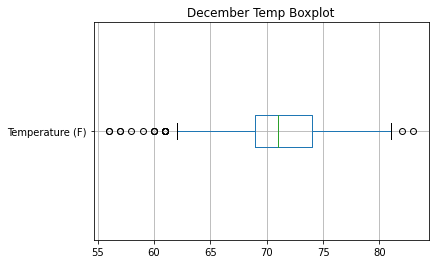

In [86]:
#continue skew analysis with box plots
import matplotlib.pyplot as plt
Dec_temps.boxplot(vert=False)
plt.title('December Temp Boxplot')

Text(0.5, 1.0, 'June Temp Boxplot')

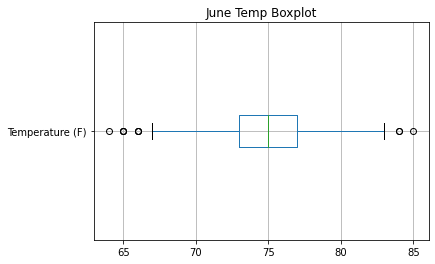

In [94]:
June_temps.boxplot(vert=False)
plt.title('June Temp Boxplot')

<AxesSubplot:ylabel='Density'>

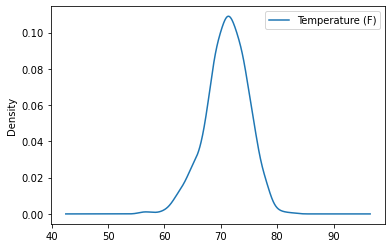

In [95]:
#plot prob density function for june and dec
Dec_temps.plot.density()

<AxesSubplot:ylabel='Density'>

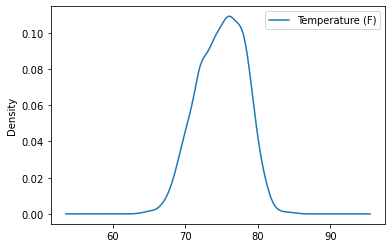

In [96]:
#june prob density
June_temps.plot.density()

In [105]:
#review results to count year by year temp observations in each month
decresults = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date)==12)
junresults = session.query(Measurement.date, Measurement.tobs).filter(extract("month", Measurement.date)==6)

In [106]:
decresults = pd.DataFrame(decresults)
junresults = pd.DataFrame(junresults)

In [107]:
decresults['year']=pd.to_datetime(decresults[0]).dt.year
junresults['year']=pd.to_datetime(junresults[0]).dt.year

In [110]:
decresults.groupby('year').count()

,0,1
year,,
2010,235,235
2011,223,223
2012,218,218
2013,234,234
2014,223,223
2015,184,184
2016,200,200


In [109]:
junresults.groupby('year').count()

,0,1
year,,
2010,242,242
2011,227,227
2012,211,211
2013,217,217
2014,215,215
2015,203,203
2016,194,194
2017,191,191
